# Get data


In [1]:
!wget https://opendata.rijdendetreinen.nl/public/tariff-distances/tariff-distances-2022-01.csv -O data/distances_2022.csv

--2025-10-16 13:46:06--  https://opendata.rijdendetreinen.nl/public/tariff-distances/tariff-distances-2022-01.csv
Resolving opendata.rijdendetreinen.nl (opendata.rijdendetreinen.nl)... 2a06:98c1:3120::b, 2a06:98c1:3121::b, 188.114.97.11, ...
Connecting to opendata.rijdendetreinen.nl (opendata.rijdendetreinen.nl)|2a06:98c1:3120::b|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 583534 (570K) [application/octet-stream]
Saving to: ‘data/distances_2022.csv’

data/distances_2022 100%[===================>] 569.86K  --.-KB/s    in 0.04s   

2025-10-16 13:46:06 (12.6 MB/s) - ‘data/distances_2022.csv’ saved [583534/583534]



In [2]:
!wget https://opendata.rijdendetreinen.nl/public/stations/stations-2023-09.csv -O data/stations_2023.csv

--2025-10-16 13:46:06--  https://opendata.rijdendetreinen.nl/public/stations/stations-2023-09.csv
Resolving opendata.rijdendetreinen.nl (opendata.rijdendetreinen.nl)... 2a06:98c1:3120::b, 2a06:98c1:3121::b, 188.114.97.11, ...
Connecting to opendata.rijdendetreinen.nl (opendata.rijdendetreinen.nl)|2a06:98c1:3120::b|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65007 (63K) [application/octet-stream]
Saving to: ‘data/stations_2023.csv’

data/stations_2023. 100%[===================>]  63.48K  --.-KB/s    in 0.03s   

2025-10-16 13:46:06 (2.43 MB/s) - ‘data/stations_2023.csv’ saved [65007/65007]



In [3]:
!bash download_disruptions.sh

--2025-10-16 13:46:07--  https://opendata.rijdendetreinen.nl/public/disruptions/disruptions-2011.csv
Resolving opendata.rijdendetreinen.nl (opendata.rijdendetreinen.nl)... 2a06:98c1:3120::b, 2a06:98c1:3121::b, 188.114.97.11, ...
Connecting to opendata.rijdendetreinen.nl (opendata.rijdendetreinen.nl)|2a06:98c1:3120::b|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 410085 (400K) [application/octet-stream]
Saving to: ‘data/disruptions/disruptions_2011.csv’

data/disruptions/di 100%[===================>] 400.47K  --.-KB/s    in 0.04s   

2025-10-16 13:46:07 (10.0 MB/s) - ‘data/disruptions/disruptions_2011.csv’ saved [410085/410085]

--2025-10-16 13:46:07--  https://opendata.rijdendetreinen.nl/public/disruptions/disruptions-2012.csv
Resolving opendata.rijdendetreinen.nl (opendata.rijdendetreinen.nl)... 2a06:98c1:3120::b, 2a06:98c1:3121::b, 188.114.97.11, ...
Connecting to opendata.rijdendetreinen.nl (opendata.rijdendetreinen.nl)|2a06:98c1:3120::b|:443... connected

There is no single dataset for 2025, so I omit it. I have only datasets for 2019-2024 inclusive.


In [4]:
!bash download_services.sh

--2025-10-16 13:46:11--  https://opendata.rijdendetreinen.nl/public/services/services-2019.csv.gz
Resolving opendata.rijdendetreinen.nl (opendata.rijdendetreinen.nl)... 2a06:98c1:3120::b, 2a06:98c1:3121::b, 188.114.97.11, ...
Connecting to opendata.rijdendetreinen.nl (opendata.rijdendetreinen.nl)|2a06:98c1:3120::b|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 382832398 (365M) [application/octet-stream]
Saving to: ‘data/services/services_2019.csv.gz’

data/services/servi 100%[===================>] 365.10M  49.8MB/s    in 7.3s    

2025-10-16 13:46:19 (49.8 MB/s) - ‘data/services/services_2019.csv.gz’ saved [382832398/382832398]

--2025-10-16 13:46:20--  https://opendata.rijdendetreinen.nl/public/services/services-2020.csv.gz
Resolving opendata.rijdendetreinen.nl (opendata.rijdendetreinen.nl)... 2a06:98c1:3120::b, 2a06:98c1:3121::b, 188.114.97.11, ...
Connecting to opendata.rijdendetreinen.nl (opendata.rijdendetreinen.nl)|2a06:98c1:3120::b|:443... connected.
H

In [5]:
import duckdb

db = duckdb.connect("data/train_db.duckdb")

In [6]:
db.sql(
    query="""
CREATE TABLE stations AS SELECT * FROM read_csv('data/stations_2023.csv')
"""
)

CatalogException: Catalog Error: Table with name "stations" already exists!

In [ ]:
db.sql(
    query="""
CREATE TABLE distances AS SELECT * FROM read_csv('data/distances_2022.csv', nullstr='XXX')
"""
)

In [ ]:
db.sql(
    query="""
CREATE TABLE distances_long AS UNPIVOT distances ON COLUMNS (* EXCLUDE station) INTO NAME other_station VALUE distance
"""
)

In [ ]:
db.sql(query="""SELECT * FROM distances_long limit 10""")

┌─────────┬───────────────┬──────────┐
│ Station │ other_station │ distance │
│ varchar │    varchar    │  int64   │
├─────────┼───────────────┼──────────┤
│ AC      │ AH            │       82 │
│ AC      │ AHP           │       83 │
│ AC      │ AHPR          │       85 │
│ AC      │ AHZ           │       90 │
│ AC      │ AKL           │       71 │
│ AC      │ AKM           │      188 │
│ AC      │ ALM           │       32 │
│ AC      │ ALMB          │       38 │
│ AC      │ ALMM          │       31 │
│ AC      │ ALMO          │       40 │
├─────────┴───────────────┴──────────┤
│ 10 rows                  3 columns │
└────────────────────────────────────┘

In [ ]:
db.sql(
    query="""
COPY (SELECT * FROM read_csv("data/services/*.csv")) TO "data/services.parquet" (COMPRESSION zstd);
"""
)

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [ ]:
db.sql("""
CREATE TABLE services AS SELECT * FROM "data/services.parquet"
""")

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [15]:
conn_string = "host=localhost user=postgres password=postgres dbname=postgres"
db.sql(
    query=f"""
ATTACH IF NOT EXISTS '{conn_string}' AS postgres (TYPE postgres)
"""
)

In [17]:
db.sql(
    query="""
COPY (SELECT * FROM read_csv('data/disruptions/*.csv')) TO postgres 
"""
)

In [19]:
db.sql("""SHOW ALL TABLES""")

┌──────────┬─────────┬─────────────────────┬────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

### How many trains departed from Amsterdam Central station overall


In [20]:
db.sql(
    query="""
SELECT "Stop:Station name", COUNT(*) AS departures 
FROM services where "Stop:Departure time" IS NOT Null 
AND "Stop:Station name" = 'Amsterdam Centraal' 
GROUP BY "Stop:Station name"
"""
)

┌────────────────────┬────────────┐
│ Stop:Station name  │ departures │
│      varchar       │   int64    │
├────────────────────┼────────────┤
│ Amsterdam Centraal │    1667971 │
└────────────────────┴────────────┘

### Average arrival delay of different service types descending by average delay.


In [21]:
db.sql(
    query="""
SELECT "Service:Type", ROUND(AVG("Stop:Arrival delay"),2) as avg_delay 
FROM services where "Stop:Arrival delay" IS NOT Null  
GROUP BY "Service:Type"
ORDER BY avg_delay DESC
"""
)

┌──────────────────────┬───────────┐
│     Service:Type     │ avg_delay │
│       varchar        │  double   │
├──────────────────────┼───────────┤
│ Alpen Express        │     31.84 │
│ Krokus Express       │      18.3 │
│ European Sleeper     │     12.18 │
│ Nightjet             │      9.01 │
│ Eurostar             │      6.91 │
│ Thalys               │       5.4 │
│ ICE International    │      5.31 │
│ Int. Trein           │      4.95 │
│ Nachttrein           │      4.28 │
│ Stoomtrein           │      3.37 │
│     ·                │        ·  │
│     ·                │        ·  │
│     ·                │        ·  │
│ Taxibus ipv trein    │       0.0 │
│ Stopbus i.p.v. trein │       0.0 │
│ Belbus               │       0.0 │
│ Snelbus i.p.v. trein │       0.0 │
│ stoptrein            │       0.0 │
│ Metro                │       0.0 │
│ Metro ipv trein      │       0.0 │
│ Tram ipv trein       │       0.0 │
│ Niet instappen       │       0.0 │
│ Tram i.p.v. trein    │       0.0 │
├

### The most common disruption cause in different years.


In [22]:
db.sql(query="""
SELECT MODE("cause_en") as cause, date_part('year', (start_time)::date) as year 
FROM postgres.disruptions 
GROUP BY year 
ORDER BY YEAR ASC
"""
)

┌───────────────────┬───────┐
│       cause       │ year  │
│      varchar      │ int64 │
├───────────────────┼───────┤
│ broken down train │  2011 │
│ points failure    │  2012 │
│ points failure    │  2013 │
│ broken down train │  2014 │
│ broken down train │  2015 │
│ broken down train │  2016 │
│ broken down train │  2017 │
│ broken down train │  2018 │
│ broken down train │  2019 │
│ broken down train │  2020 │
│ broken down train │  2021 │
│ broken down train │  2022 │
│ broken down train │  2023 │
├───────────────────┴───────┤
│ 13 rows         2 columns │
└───────────────────────────┘

### Trains that started their overall service in any Amsterdam station.


In [23]:
db.sql(
    query="""
SELECT COUNT(*) as trains FROM services 
WHERE "Stop:Departure time" IS NOT Null 
AND "Stop:Station Name" LIKE ('%Amsterdam%')
"""
)

┌─────────┐
│ trains  │
│  int64  │
├─────────┤
│ 7674845 │
└─────────┘

### Fraction of services that was run to final destinations outside the Netherlands


In [24]:
db.sql(
    query="""
WITH all_runs AS (SELECT COUNT(DISTINCT "Service:RDT-ID") as total_runs FROM services),
       
outside_nl_runs AS (SELECT COUNT(DISTINCT "Service:RDT-ID") as total_runs
FROM services INNER JOIN stations on services."Stop:Station name" = stations.name_long
WHERE stations.country <> 'NL')

select outside_nl_runs.total_runs as outside_nl_runs, all_runs.total_runs as all_runs,
ROUND(100.0 * outside_nl_runs.total_runs / all_runs.total_runs,2) as percentage_outside_runs
from outside_nl_runs, all_runs

"""
)

┌─────────────────┬──────────┬─────────────────────────┐
│ outside_nl_runs │ all_runs │ percentage_outside_runs │
│      int64      │  int64   │         double          │
├─────────────────┼──────────┼─────────────────────────┤
│          942732 │ 14348031 │                    6.57 │
└─────────────────┴──────────┴─────────────────────────┘

### The largest distance between stations in the Netherlands


In [25]:
db.sql("""
        SELECT s1.name_long as departure, s2.name_long as arrival, distances_long.distance as distance from distances_long
       INNER JOIN stations AS s1 ON distances_long.station = s1.code
       INNER JOIN stations AS s2 ON distances_long.other_station = s2.code
       WHERE s1.country = 'NL' AND s2.country = 'NL' AND s1.name_long > s2.name_long
       ORDER BY distance DESC
       LIMIT 1
       """)

┌────────────┬───────────┬──────────┐
│ departure  │  arrival  │ distance │
│  varchar   │  varchar  │  int64   │
├────────────┼───────────┼──────────┤
│ Vlissingen │ Eemshaven │      426 │
└────────────┴───────────┴──────────┘

### Average arrival delay between different train operators.


In [26]:
avg_delay_by_comapny = db.sql(
    query="""
SELECT "Service:Company" as company, ROUND(AVG("Stop:Arrival delay"),2) as avg_delay 
       FROM services 
       GROUP BY company 
       ORDER BY avg_delay DESC
"""
).df()

<Axes: xlabel='company'>

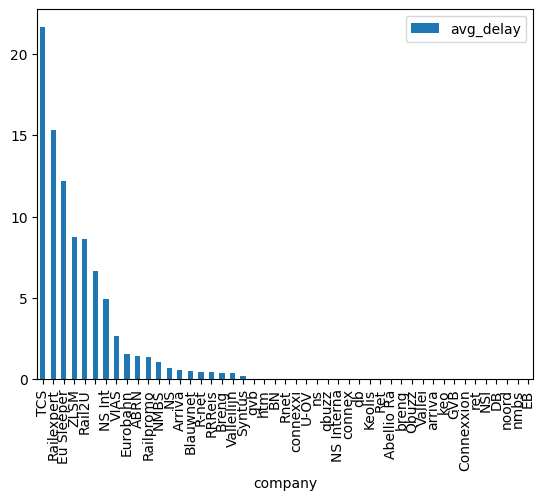

In [27]:
avg_delay_by_comapny.plot.bar(x="company", y="avg_delay")

### Number of services disrupted in different years


In [28]:
disruptions_by_year = db.sql(
    query="""
SELECT COUNT(*) as occurrences, date_part('year', (start_time)::date) as year, from postgres.disruptions 
GROUP BY year 
ORDER BY year ASC

"""
).df()

<Axes: xlabel='year'>

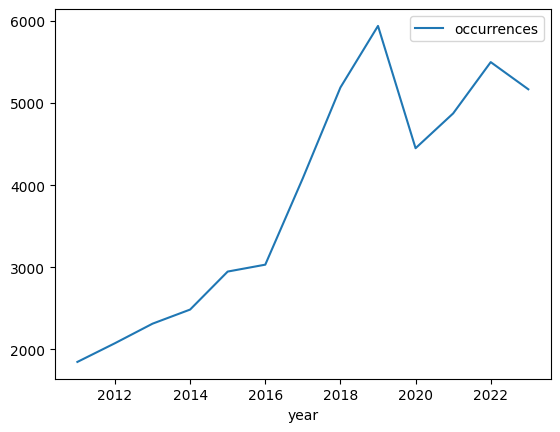

In [29]:
disruptions_by_year.set_index("year").plot()

### Fraction of all services that were cancelled in different years


In [30]:
cancellation_by_year = db.sql(
    query="""
with total_runs AS (
SELECT  date_part('year',  "Service:Date") AS year, 
COUNT(DISTINCT "Service:RDT-ID") AS runs 
FROM services 
GROUP BY year 
ORDER BY year ASC),

cancelled_runs AS (
SELECT  date_part('year',  "Service:Date") AS year, 
COUNT(DISTINCT "Service:RDT-ID") AS runs 
FROM services 
WHERE "Service:Completely cancelled" = true 
GROUP BY year 
ORDER BY year ASC)

SELECT t.year AS year, ROUND(100.0 * c.runs / t.runs , 2) AS pct_cancelled 
FROM total_runs AS t 
INNER JOIN cancelled_runs AS c 
ON t.year = c.year 
ORDER BY year ASC

"""
).df()

<Axes: title={'center': 'Percentage of cancelled services by year'}, xlabel='year'>

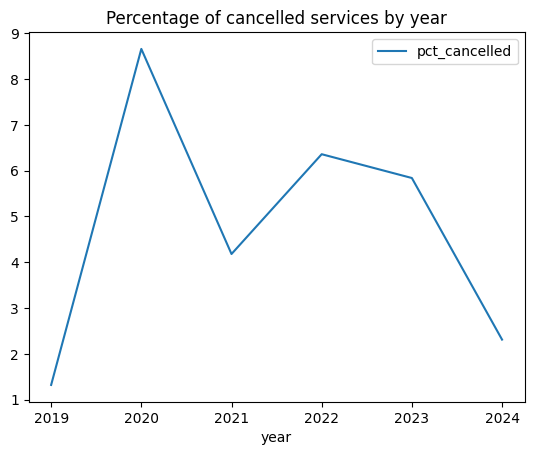

In [31]:
cancellation_by_year.set_index("year").plot(
    title="Percentage of cancelled services by year"
)

## Service lengths


In [49]:
db.sql(
    query="""
CREATE TABLE station_connections AS
WITH station_pairs AS (
SELECT 
"Service:RDT-ID",
"Stop:Station code" AS start_station,
LEAD("Stop:Station code") OVER (
PARTITION BY "Service:RDT-ID" 
ORDER BY "Stop:Departure time"
) AS end_station
FROM services
WHERE "Stop:Departure time" IS NOT NULL
),
distinct_pairs AS (
SELECT DISTINCT
CASE 
WHEN start_station < end_station THEN start_station 
ELSE end_station 
END AS start_station_code,
CASE 
WHEN start_station < end_station THEN end_station 
ELSE start_station 
END AS end_station_code
FROM station_pairs
WHERE end_station IS NOT NULL
)
SELECT DISTINCT
dp.start_station_code,
dp.end_station_code,
d.distance
FROM distinct_pairs dp
JOIN distances_long d
ON (d.station = dp.start_station_code AND d.other_station = dp.end_station_code)
OR (d.station = dp.end_station_code AND d.other_station = dp.start_station_code)
"""
)

In [50]:
db.sql("""SELECT * FROM station_connections""")

┌────────────────────┬──────────────────┬──────────┐
│ start_station_code │ end_station_code │ distance │
│      varchar       │     varchar      │  int64   │
├────────────────────┼──────────────────┼──────────┤
│ MT                 │ TB               │      135 │
│ AHP                │ HT               │       63 │
│ NWK                │ UTG              │       90 │
│ AML                │ OBD              │      194 │
│ KLP                │ VB               │       91 │
│ APN                │ HVS              │       53 │
│ GS                 │ VSS              │       24 │
│ RVS                │ WC               │        7 │
│ ASN                │ ZL               │       78 │
│ KPNZ               │ ZL               │       15 │
│  ·                 │ ·                │        · │
│  ·                 │ ·                │        · │
│  ·                 │ ·                │        · │
│ ASD                │ BV               │       29 │
│ ASD                │ HT               │     

### Largest distance between a pair of stations

In [51]:
db.sql(query="""
SELECT *
FROM station_connections 
ORDER BY distance DESC 
LIMIT 1
""")

┌────────────────────┬──────────────────┬──────────┐
│ start_station_code │ end_station_code │ distance │
│      varchar       │     varchar      │  int64   │
├────────────────────┼──────────────────┼──────────┤
│ HNP                │ VSS              │      411 │
└────────────────────┴──────────────────┴──────────┘

### histogram of inter-station distances run by trains

In [52]:
inter_station_distances = db.sql("""SELECT * FROM station_connections""").df()

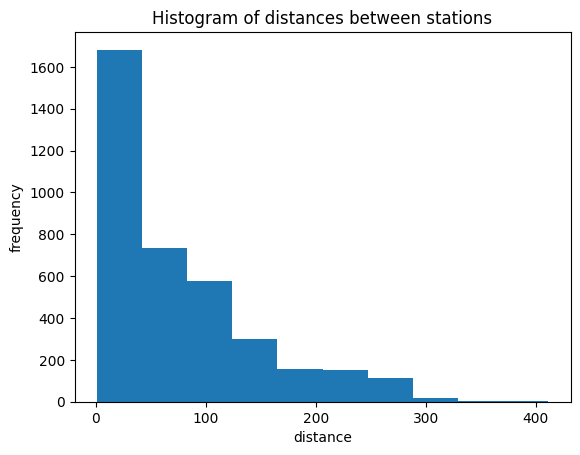

In [53]:
import matplotlib.pyplot as plt

plt.hist(x=inter_station_distances['distance'], bins=10)
plt.title("Histogram of distances between stations")
plt.xlabel("distance")
plt.ylabel("frequency")
plt.show()